<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/128*128_brecahad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
from skimage.measure import label, regionprops
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
TRAIN_PATH = '/content/drive/MyDrive/dataset/BreCaHAD/train/images/'
TEST_PATH = '/content/drive/MyDrive/dataset/BreCaHAD/test/images/'

train_ids = os.listdir(TRAIN_PATH)
test_ids = os.listdir(TEST_PATH)

In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
BATCH_SIZE = 32
seed = 42

In [6]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  print(id_)
  path = TRAIN_PATH 
  img = imread(path + id_)[:,:,:IMG_CHANNELS]  
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_train[n] = img 
  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
  mask_ = imread('/content/drive/MyDrive/dataset/BreCaHAD/train/mask/'+ id_,as_gray=True)
  mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                    preserve_range=True), axis=-1)
  print(mask_.shape)
  mask_=np.reshape(mask_,(128,128,1))
  mask = np.maximum(mask, mask_)             
  Y_train[n] = mask

  0%|          | 0/150 [00:00<?, ?it/s]

Case_1-05.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
  1%|          | 1/150 [00:00<01:01,  2.42it/s]

(128, 128, 1)
Case_15-02.jpg


  1%|▏         | 2/150 [00:00<01:07,  2.19it/s]

(128, 128, 1)
Case_8-01.jpg


  2%|▏         | 3/150 [00:01<01:05,  2.23it/s]

(128, 128, 1)
Case_4-09.jpg


  3%|▎         | 4/150 [00:01<01:04,  2.27it/s]

(128, 128, 1)
Case_15-01.jpg


  3%|▎         | 5/150 [00:02<01:03,  2.29it/s]

(128, 128, 1)
Case_12-10.jpg


  4%|▍         | 6/150 [00:02<01:02,  2.29it/s]

(128, 128, 1)
Case_17-06.jpg


  5%|▍         | 7/150 [00:03<01:02,  2.30it/s]

(128, 128, 1)
Case_16-09.jpg


  5%|▌         | 8/150 [00:03<01:02,  2.28it/s]

(128, 128, 1)
Case_5-01.jpg


  6%|▌         | 9/150 [00:03<01:01,  2.30it/s]

(128, 128, 1)
Case_12-03.jpg


  7%|▋         | 10/150 [00:04<01:00,  2.30it/s]

(128, 128, 1)
Case_17-08.jpg


  7%|▋         | 11/150 [00:04<01:01,  2.28it/s]

(128, 128, 1)
Case_17-07.jpg


  8%|▊         | 12/150 [00:05<01:03,  2.17it/s]

(128, 128, 1)
Case_6-08.jpg


  9%|▊         | 13/150 [00:05<01:02,  2.21it/s]

(128, 128, 1)
Case_15-10.jpg


  9%|▉         | 14/150 [00:06<01:00,  2.25it/s]

(128, 128, 1)
Case_17-12.jpg


 10%|█         | 15/150 [00:06<00:59,  2.27it/s]

(128, 128, 1)
Case_13-06.jpg


 11%|█         | 16/150 [00:07<00:58,  2.28it/s]

(128, 128, 1)
Case_11-12.jpg


 11%|█▏        | 17/150 [00:07<00:57,  2.29it/s]

(128, 128, 1)
Case_12-05.jpg


 12%|█▏        | 18/150 [00:07<00:57,  2.30it/s]

(128, 128, 1)
Case_12-09.jpg


 13%|█▎        | 19/150 [00:08<00:56,  2.31it/s]

(128, 128, 1)
Case_14-04.jpg


 13%|█▎        | 20/150 [00:08<00:56,  2.31it/s]

(128, 128, 1)
Case_5-02.jpg


 14%|█▍        | 21/150 [00:09<00:55,  2.31it/s]

(128, 128, 1)
Case_2-07.jpg


 15%|█▍        | 22/150 [00:09<00:55,  2.32it/s]

(128, 128, 1)
Case_1-04.jpg


 15%|█▌        | 23/150 [00:10<00:54,  2.34it/s]

(128, 128, 1)
Case_14-09.jpg


 16%|█▌        | 24/150 [00:10<00:54,  2.32it/s]

(128, 128, 1)
Case_3-09.jpg


 17%|█▋        | 25/150 [00:10<00:53,  2.33it/s]

(128, 128, 1)
Case_9-03.jpg


 17%|█▋        | 26/150 [00:11<00:55,  2.24it/s]

(128, 128, 1)
Case_10-09.jpg


 18%|█▊        | 27/150 [00:11<00:55,  2.21it/s]

(128, 128, 1)
Case_5-07.jpg


 19%|█▊        | 28/150 [00:12<00:54,  2.23it/s]

(128, 128, 1)
Case_9-02.jpg


 19%|█▉        | 29/150 [00:12<00:54,  2.24it/s]

(128, 128, 1)
Case_4-04.jpg


 20%|██        | 30/150 [00:13<00:53,  2.25it/s]

(128, 128, 1)
Case_2-03.jpg


 21%|██        | 31/150 [00:13<00:53,  2.24it/s]

(128, 128, 1)
Case_13-04.jpg


 21%|██▏       | 32/150 [00:14<00:57,  2.04it/s]

(128, 128, 1)
Case_14-02.jpg


 22%|██▏       | 33/150 [00:14<00:55,  2.12it/s]

(128, 128, 1)
Case_5-05.jpg


 23%|██▎       | 34/150 [00:15<00:52,  2.19it/s]

(128, 128, 1)
Case_15-07.jpg


 23%|██▎       | 35/150 [00:15<00:51,  2.24it/s]

(128, 128, 1)
Case_9-04.jpg


 24%|██▍       | 36/150 [00:15<00:50,  2.27it/s]

(128, 128, 1)
Case_14-12.jpg


 25%|██▍       | 37/150 [00:16<00:48,  2.31it/s]

(128, 128, 1)
Case_1-03.jpg


 25%|██▌       | 38/150 [00:16<00:48,  2.33it/s]

(128, 128, 1)
Case_3-02.jpg


 26%|██▌       | 39/150 [00:17<00:47,  2.34it/s]

(128, 128, 1)
Case_2-06.jpg


 27%|██▋       | 40/150 [00:17<00:47,  2.34it/s]

(128, 128, 1)
Case_10-02.jpg


 27%|██▋       | 41/150 [00:18<00:47,  2.32it/s]

(128, 128, 1)
Case_6-03.jpg


 28%|██▊       | 42/150 [00:18<00:48,  2.24it/s]

(128, 128, 1)
Case_15-12.jpg


 29%|██▊       | 43/150 [00:18<00:47,  2.26it/s]

(128, 128, 1)
Case_5-04.jpg


 29%|██▉       | 44/150 [00:19<00:46,  2.29it/s]

(128, 128, 1)
Case_17-09.jpg


 30%|███       | 45/150 [00:19<00:45,  2.31it/s]

(128, 128, 1)
Case_16-05.jpg


 31%|███       | 46/150 [00:20<00:45,  2.30it/s]

(128, 128, 1)
Case_14-11.jpg


 31%|███▏      | 47/150 [00:20<00:44,  2.31it/s]

(128, 128, 1)
Case_16-08.jpg


 32%|███▏      | 48/150 [00:21<00:44,  2.30it/s]

(128, 128, 1)
Case_14-06.jpg


 33%|███▎      | 49/150 [00:21<00:43,  2.30it/s]

(128, 128, 1)
Case_1-06.jpg


 33%|███▎      | 50/150 [00:22<00:43,  2.31it/s]

(128, 128, 1)
Case_3-05.jpg


 34%|███▍      | 51/150 [00:22<00:42,  2.32it/s]

(128, 128, 1)
Case_2-05.jpg


 35%|███▍      | 52/150 [00:22<00:42,  2.32it/s]

(128, 128, 1)
Case_10-05.jpg


 35%|███▌      | 53/150 [00:23<00:41,  2.32it/s]

(128, 128, 1)
Case_11-11.jpg


 36%|███▌      | 54/150 [00:23<00:41,  2.30it/s]

(128, 128, 1)
Case_1-02.jpg


 37%|███▋      | 55/150 [00:24<00:41,  2.31it/s]

(128, 128, 1)
Case_6-07.jpg


 37%|███▋      | 56/150 [00:24<00:40,  2.32it/s]

(128, 128, 1)
Case_17-05.jpg


 38%|███▊      | 57/150 [00:25<00:40,  2.30it/s]

(128, 128, 1)
Case_17-10.jpg


 39%|███▊      | 58/150 [00:25<00:39,  2.31it/s]

(128, 128, 1)
Case_8-02.jpg


 39%|███▉      | 59/150 [00:25<00:39,  2.30it/s]

(128, 128, 1)
Case_6-05.jpg


 40%|████      | 60/150 [00:26<00:38,  2.32it/s]

(128, 128, 1)
Case_14-05.jpg


 41%|████      | 61/150 [00:26<00:38,  2.30it/s]

(128, 128, 1)
Case_3-06.jpg


 41%|████▏     | 62/150 [00:27<00:38,  2.31it/s]

(128, 128, 1)
Case_15-09.jpg


 42%|████▏     | 63/150 [00:27<00:37,  2.30it/s]

(128, 128, 1)
Case_4-01.jpg


 43%|████▎     | 64/150 [00:28<00:37,  2.30it/s]

(128, 128, 1)
Case_12-07.jpg


 43%|████▎     | 65/150 [00:28<00:36,  2.31it/s]

(128, 128, 1)
Case_11-15.jpg


 44%|████▍     | 66/150 [00:28<00:36,  2.29it/s]

(128, 128, 1)
Case_16-10.jpg


 45%|████▍     | 67/150 [00:29<00:35,  2.32it/s]

(128, 128, 1)
Case_16-03.jpg


 45%|████▌     | 68/150 [00:29<00:35,  2.32it/s]

(128, 128, 1)
Case_9-08.jpg


 46%|████▌     | 69/150 [00:30<00:34,  2.32it/s]

(128, 128, 1)
Case_9-07.jpg


 47%|████▋     | 70/150 [00:30<00:34,  2.33it/s]

(128, 128, 1)
Case_16-02.jpg


 47%|████▋     | 71/150 [00:31<00:34,  2.32it/s]

(128, 128, 1)
Case_13-01.jpg


 48%|████▊     | 72/150 [00:31<00:33,  2.33it/s]

(128, 128, 1)
Case_13-07.jpg


 49%|████▊     | 73/150 [00:31<00:32,  2.33it/s]

(128, 128, 1)
Case_17-01.jpg


 49%|████▉     | 74/150 [00:32<00:32,  2.32it/s]

(128, 128, 1)
Case_2-02.jpg


 50%|█████     | 75/150 [00:32<00:32,  2.32it/s]

(128, 128, 1)
Case_16-01.jpg


 51%|█████     | 76/150 [00:33<00:32,  2.29it/s]

(128, 128, 1)
Case_9-05.jpg


 51%|█████▏    | 77/150 [00:33<00:31,  2.31it/s]

(128, 128, 1)
Case_10-01.jpg


 52%|█████▏    | 78/150 [00:34<00:31,  2.31it/s]

(128, 128, 1)
Case_15-06.jpg


 53%|█████▎    | 79/150 [00:34<00:30,  2.32it/s]

(128, 128, 1)
Case_6-02.jpg


 53%|█████▎    | 80/150 [00:34<00:30,  2.32it/s]

(128, 128, 1)
Case_5-08.jpg


 54%|█████▍    | 81/150 [00:35<00:30,  2.27it/s]

(128, 128, 1)
Case_14-03.jpg


 55%|█████▍    | 82/150 [00:35<00:29,  2.28it/s]

(128, 128, 1)
Case_1-01.jpg


 55%|█████▌    | 83/150 [00:36<00:29,  2.27it/s]

(128, 128, 1)
Case_13-03.jpg


 56%|█████▌    | 84/150 [00:36<00:28,  2.28it/s]

(128, 128, 1)
Case_9-01.jpg


 57%|█████▋    | 85/150 [00:37<00:28,  2.27it/s]

(128, 128, 1)
Case_12-06.jpg


 57%|█████▋    | 86/150 [00:37<00:28,  2.28it/s]

(128, 128, 1)
Case_15-04.jpg


 58%|█████▊    | 87/150 [00:38<00:27,  2.31it/s]

(128, 128, 1)
Case_12-02.jpg


 59%|█████▊    | 88/150 [00:38<00:26,  2.32it/s]

(128, 128, 1)
Case_13-11.jpg


 59%|█████▉    | 89/150 [00:38<00:26,  2.32it/s]

(128, 128, 1)
Case_13-02.jpg


 60%|██████    | 90/150 [00:39<00:26,  2.27it/s]

(128, 128, 1)
Case_10-07.jpg


 61%|██████    | 91/150 [00:40<00:35,  1.68it/s]

(128, 128, 1)
Case_3-08.jpg


 61%|██████▏   | 92/150 [00:41<00:41,  1.40it/s]

(128, 128, 1)
Case_4-08.jpg


 62%|██████▏   | 93/150 [00:42<00:41,  1.38it/s]

(128, 128, 1)
Case_16-12.jpg


 63%|██████▎   | 94/150 [00:42<00:42,  1.31it/s]

(128, 128, 1)
Case_14-07.jpg


 63%|██████▎   | 95/150 [00:43<00:36,  1.51it/s]

(128, 128, 1)
Case_15-03.jpg


 64%|██████▍   | 96/150 [00:43<00:32,  1.68it/s]

(128, 128, 1)
Case_15-08.jpg


 65%|██████▍   | 97/150 [00:44<00:29,  1.79it/s]

(128, 128, 1)
Case_4-10.jpg


 65%|██████▌   | 98/150 [00:44<00:27,  1.92it/s]

(128, 128, 1)
Case_3-04.jpg


 66%|██████▌   | 99/150 [00:45<00:25,  2.03it/s]

(128, 128, 1)
Case_16-07.jpg


 67%|██████▋   | 100/150 [00:45<00:23,  2.10it/s]

(128, 128, 1)
Case_15-05.jpg


 67%|██████▋   | 101/150 [00:45<00:22,  2.15it/s]

(128, 128, 1)
Case_10-06.jpg


 68%|██████▊   | 102/150 [00:46<00:22,  2.17it/s]

(128, 128, 1)
Case_4-07.jpg


 69%|██████▊   | 103/150 [00:46<00:21,  2.22it/s]

(128, 128, 1)
Case_14-08.jpg


 69%|██████▉   | 104/150 [00:47<00:20,  2.24it/s]

(128, 128, 1)
Case_4-06.jpg


 70%|███████   | 105/150 [00:47<00:19,  2.27it/s]

(128, 128, 1)
Case_16-04.jpg


 71%|███████   | 106/150 [00:48<00:19,  2.30it/s]

(128, 128, 1)
Case_6-06.jpg


 71%|███████▏  | 107/150 [00:48<00:18,  2.30it/s]

(128, 128, 1)
Case_12-04.jpg


 72%|███████▏  | 108/150 [00:49<00:18,  2.31it/s]

(128, 128, 1)
Case_3-10.jpg


 73%|███████▎  | 109/150 [00:49<00:17,  2.32it/s]

(128, 128, 1)
Case_10-04.jpg


 73%|███████▎  | 110/150 [00:49<00:17,  2.31it/s]

(128, 128, 1)
Case_12-01.jpg


 74%|███████▍  | 111/150 [00:50<00:16,  2.31it/s]

(128, 128, 1)
Case_8-04.jpg


 75%|███████▍  | 112/150 [00:50<00:16,  2.30it/s]

(128, 128, 1)
Case_4-03.jpg


 75%|███████▌  | 113/150 [00:51<00:15,  2.32it/s]

(128, 128, 1)
Case_3-07.jpg


 76%|███████▌  | 114/150 [00:51<00:15,  2.32it/s]

(128, 128, 1)
Case_10-03.jpg


 77%|███████▋  | 115/150 [00:52<00:15,  2.30it/s]

(128, 128, 1)
Case_9-10.jpg


 77%|███████▋  | 116/150 [00:52<00:14,  2.30it/s]

(128, 128, 1)
Case_11-13.jpg


 78%|███████▊  | 117/150 [00:52<00:14,  2.31it/s]

(128, 128, 1)
Case_13-10.jpg


 79%|███████▊  | 118/150 [00:53<00:13,  2.31it/s]

(128, 128, 1)
Case_17-03.jpg


 79%|███████▉  | 119/150 [00:53<00:13,  2.31it/s]

(128, 128, 1)
Case_16-06.jpg


 80%|████████  | 120/150 [00:54<00:12,  2.33it/s]

(128, 128, 1)
Case_17-11.jpg


 81%|████████  | 121/150 [00:54<00:12,  2.30it/s]

(128, 128, 1)
Case_14-01.jpg


 81%|████████▏ | 122/150 [00:55<00:12,  2.31it/s]

(128, 128, 1)
Case_13-05.jpg


 82%|████████▏ | 123/150 [00:55<00:11,  2.33it/s]

(128, 128, 1)
Case_12-08.jpg


 83%|████████▎ | 124/150 [00:55<00:11,  2.33it/s]

(128, 128, 1)
Case_3-03.jpg


 83%|████████▎ | 125/150 [00:56<00:10,  2.33it/s]

(128, 128, 1)
Case_8-03.jpg


 84%|████████▍ | 126/150 [00:56<00:10,  2.29it/s]

(128, 128, 1)
Case_1-07.jpg


 85%|████████▍ | 127/150 [00:57<00:09,  2.30it/s]

(128, 128, 1)
Case_6-10.jpg


 85%|████████▌ | 128/150 [00:57<00:09,  2.31it/s]

(128, 128, 1)
Case_17-04.jpg


 86%|████████▌ | 129/150 [00:58<00:09,  2.32it/s]

(128, 128, 1)
Case_10-08.jpg


 87%|████████▋ | 130/150 [00:58<00:08,  2.32it/s]

(128, 128, 1)
Case_12-11.jpg


 87%|████████▋ | 131/150 [00:58<00:08,  2.33it/s]

(128, 128, 1)
Case_11-07.jpg


 88%|████████▊ | 132/150 [00:59<00:07,  2.34it/s]

(128, 128, 1)
Case_13-12.jpg


 89%|████████▊ | 133/150 [00:59<00:07,  2.33it/s]

(128, 128, 1)
Case_17-02.jpg


 89%|████████▉ | 134/150 [01:00<00:06,  2.33it/s]

(128, 128, 1)
Case_2-01.jpg


 90%|█████████ | 135/150 [01:00<00:06,  2.32it/s]

(128, 128, 1)
Case_15-11.jpg


 91%|█████████ | 136/150 [01:01<00:06,  2.32it/s]

(128, 128, 1)
Case_2-08.jpg


 91%|█████████▏| 137/150 [01:01<00:05,  2.33it/s]

(128, 128, 1)
Case_12-12.jpg


 92%|█████████▏| 138/150 [01:01<00:05,  2.31it/s]

(128, 128, 1)
Case_6-01.jpg


 93%|█████████▎| 139/150 [01:02<00:04,  2.32it/s]

(128, 128, 1)
Case_6-04.jpg


 93%|█████████▎| 140/150 [01:02<00:04,  2.33it/s]

(128, 128, 1)
Case_3-01.jpg


 94%|█████████▍| 141/150 [01:03<00:03,  2.33it/s]

(128, 128, 1)
Case_4-05.jpg


 95%|█████████▍| 142/150 [01:03<00:03,  2.34it/s]

(128, 128, 1)
Case_4-02.jpg


 95%|█████████▌| 143/150 [01:04<00:03,  2.33it/s]

(128, 128, 1)
Case_1-08.jpg


 96%|█████████▌| 144/150 [01:04<00:02,  2.32it/s]

(128, 128, 1)
Case_10-10.jpg


 97%|█████████▋| 145/150 [01:04<00:02,  2.32it/s]

(128, 128, 1)
Case_11-10.jpg


 97%|█████████▋| 146/150 [01:05<00:01,  2.33it/s]

(128, 128, 1)
Case_16-13.jpg


 98%|█████████▊| 147/150 [01:05<00:01,  2.34it/s]

(128, 128, 1)
Case_16-11.jpg


 99%|█████████▊| 148/150 [01:06<00:00,  2.33it/s]

(128, 128, 1)
Case_2-04.jpg


 99%|█████████▉| 149/150 [01:06<00:00,  2.34it/s]

(128, 128, 1)
Case_14-10.jpg


100%|██████████| 150/150 [01:07<00:00,  2.24it/s]

(128, 128, 1)


In [8]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH 
    img = imread(path +  id_ )[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

100%|██████████| 12/12 [00:03<00:00,  3.68it/s]


In [9]:
def draw_sub_plots(n,m,X,Y):
  f, axarr = plt.subplots(n,m,figsize=((10, 10)))
  ind=0
  for row in range(n):
    for col in range(m):
      if(col%2==0):
        img = X[row].reshape((128,128,3))
        axarr[row, 0].axis("off")
        axarr[row,0].imshow(img)
        title = "Train Image "+str(row+1)
        title_color = 'black'
        title = axarr[row, 0].set_title(title)
        plt.setp(title, color=title_color)
    else:
      img = Y[row]
      axarr[row, 1].axis("off")
      axarr[row,1].imshow(img)
      title = "Ground Truth Image "+str(row+1)
      title_color = 'black'
      title = axarr[row, 1].set_title(title)
      plt.setp(title, color=title_color)

In [11]:
X=[]
Y=[]
for ind in range(4):
  i = random.randint(0, len(train_ids)-30)
  X.append(X_train[i])
  Y.append(np.squeeze(Y_train[i]))

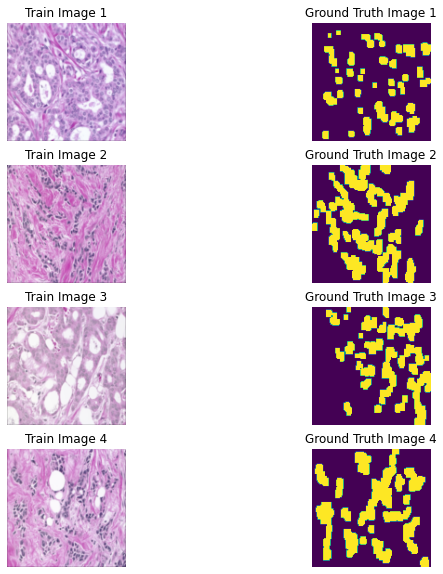

In [12]:
draw_sub_plots(4,2,X,Y)

In [13]:
from keras.preprocessing import image

image_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')
mask_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')

image_datagen.fit(X_train[:int(X_train.shape[0]*0.9)], augment=True, seed=seed)
mask_datagen.fit(Y_train[:int(Y_train.shape[0]*0.9)], augment=True, seed=seed)

x=image_datagen.flow(X_train[:int(X_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y=mask_datagen.flow(Y_train[:int(Y_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)

image_datagen_val = image.ImageDataGenerator()
mask_datagen_val = image.ImageDataGenerator()

image_datagen_val.fit(X_train[int(X_train.shape[0]*0.9):], augment=True, seed=seed)
mask_datagen_val.fit(Y_train[int(Y_train.shape[0]*0.9):], augment=True, seed=seed)

x_val=image_datagen_val.flow(X_train[int(X_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_val=mask_datagen_val.flow(Y_train[int(Y_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)

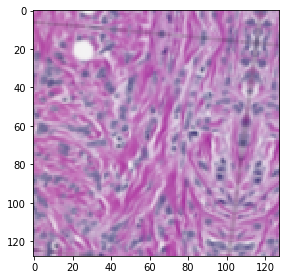

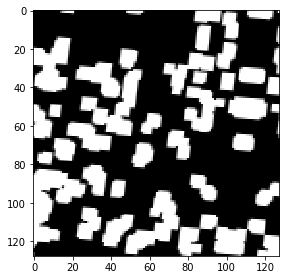

In [14]:
imshow(x.next()[0].astype(np.uint8))
plt.show()
imshow(np.squeeze(y.next()[0]))
plt.show()

In [15]:
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('/content/drive/MyDrive/dataset/BreCaHAD/model_unet_brecahd-1.h5', verbose=1, save_best_only=True)

In [17]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [25]:
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250,
                              epochs=10, callbacks=[earlystopper, checkpointer])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 0.4878 - mean_io_u: 0.3628
Epoch 1: val_loss improved from inf to 0.33668, saving model to /content/drive/MyDrive/dataset/BreCaHAD/model_unet_brecahd-1.h5
250/250 [==============================] - 56s 165ms/step - loss: 0.4878 - mean_io_u: 0.3628 - val_loss: 0.3367 - val_mean_io_u: 0.3567
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 0.3960 - mean_io_u: 0.3625
Epoch 2: val_loss improved from 0.33668 to 0.32384, saving model to /content/drive/MyDrive/dataset/BreCaHAD/model_unet_brecahd-1.h5
250/250 [==============================] - 40s 159ms/step - loss: 0.3960 - mean_io_u: 0.3625 - val_loss: 0.3238 - val_mean_io_u: 0.3567
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 0.3700 - mean_io_u: 0.3624
Epoch 3: val_loss improved from 0.32384 to 0.30477, saving model to /content/drive/MyDrive/dataset/BreCaHAD/model_unet_brecahd-1.h5
250/250 [==============================] - 40

In [18]:
from keras.models import Model, load_model
model = load_model('/content/drive/MyDrive/dataset/BreCaHAD/model_unet_brecahd-1.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

1/1 [==============================] - 1s 545ms/step


In [20]:
def draw_sub_plots_3(n,m,X,Y,Pred,name=True):
  f, axarr = plt.subplots(n,m,figsize=((15, 15)))
  ind=0
  for row in range(n):
    for col in range(m):
      if(col==0):
        img = X[row].reshape((128,128,3))
        axarr[row, 0].axis("off")
        axarr[row,0].imshow(img)
        title = "Train Image "+str(row+1)
        title_color = 'black'
        title = axarr[row, 0].set_title(title)
        plt.setp(title, color=title_color)
      
      elif(col==1):
        img = Y[row]
        axarr[row, 1].axis("off")
        axarr[row,1].imshow(img)
        if(name==True):
          title = "Ground Truth Image "+str(row+1)
        else:
          title = "Predicted Mask "+str(row+1)
        title_color = 'black'
        title = axarr[row, 1].set_title(title)
        plt.setp(title, color=title_color)
      else:
        img = Pred[row]
        axarr[row, 2].axis("off")
        axarr[row,2].imshow(img)
        title = "Predicted Image "+str(row+1)
        title_color = 'black'
        title = axarr[row, 2].set_title(title)
        plt.setp(title, color=title_color)

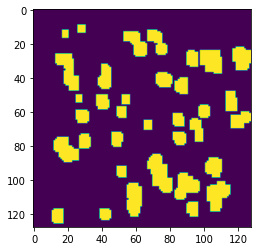

In [21]:
img = Y[0]
# axarr[0, 1].axis("off")
plt.imshow(img)
# cv2.imwrite(os.path.join("img.jpg"),img)


In [22]:
X=[]
Y=[]
draw_over=[]
gt=[]
for ind in range(4):
  i = random.randint(0, len(train_ids)-10)
  X.append(X_train[i])
  gt.append(Y_train[i])
  Y.append(resize(np.squeeze(preds_train_t[i]), (1024, 1360), mode='constant', preserve_range=True))
  image = np.squeeze(preds_train_t[i])
  img_1=X_train[i].copy()
  lbl_0 = label(image) 
  props = regionprops(lbl_0)
  for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
  draw_over.append(img_1)

In [24]:
X=[]
Y=[]
draw_over=[]
gt=[]
for ind in range(4):
  i = random.randint(0, 135)
  X.append(X_train[i])
  gt.append(Y_train[i])
  Y.append(resize(np.squeeze(preds_train_t[i]), (128,128), mode='constant', preserve_range=True))
  image = np.squeeze(preds_train_t[i])
  img_1=X_train[i].copy()
  lbl_0 = label(image) 
  props = regionprops(lbl_0)
  for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
  draw_over.append(img_1)

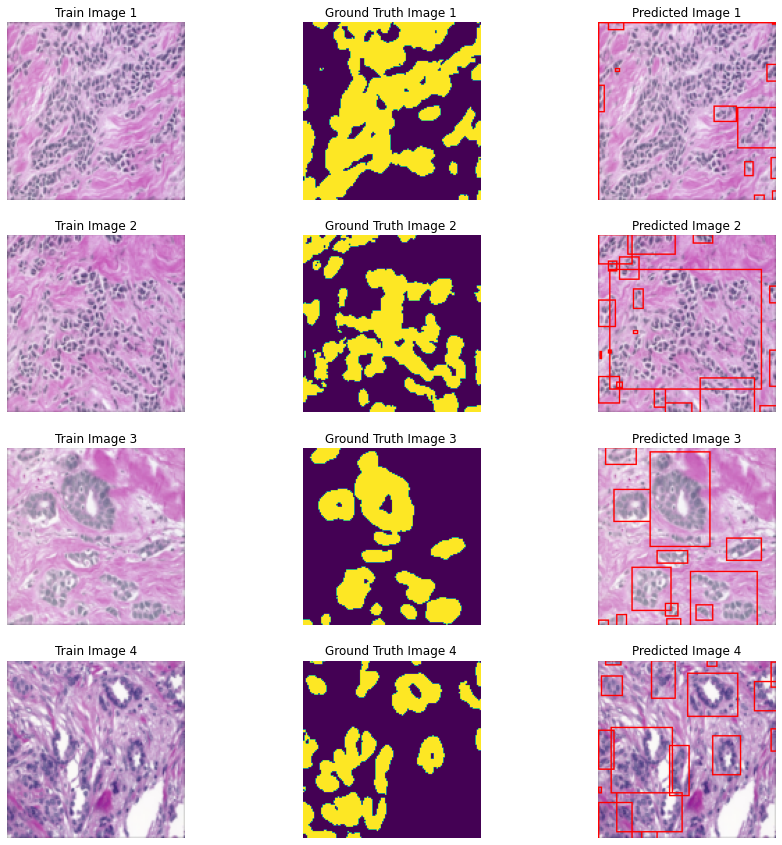

In [25]:
draw_sub_plots_3(4,3,X,Y,draw_over,True)

In [26]:
X=[]
Y=[]
draw_over=[]
for ind in range(4):
  i = random.randint(0, len(test_ids)-1)
  X.append(X_test[i])
  Y.append(resize(np.squeeze(preds_test_t[i]), (128, 128), mode='constant', preserve_range=True))
  image = np.squeeze(preds_test_t[i])
  img_1=X_test[i].copy()
  lbl_0 = label(image) 
  props = regionprops(lbl_0)
  for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
  draw_over.append(img_1)
  

In [27]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
names=[]
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH 
    img = imread(path +  id_ )[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    names.append(id_)
    X_test[n] = img

100%|██████████| 12/12 [00:03<00:00,  3.67it/s]


In [28]:
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

1/1 [==============================] - 0s 21ms/step


In [29]:
X=[]
Y=[]
draw_over=[]
for i in range(len(X_test)):
  X.append(X_test[i])
  Y.append(resize(np.squeeze(preds_test_t[i]), (128, 128), mode='constant', preserve_range=True))
  image = np.squeeze(preds_test_t[i])
  img_1=X_test[i].copy()
  lbl_0 = label(image) 
  props = regionprops(lbl_0)
  for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (0, 0, 255), 1)
  draw_over.append(img_1)

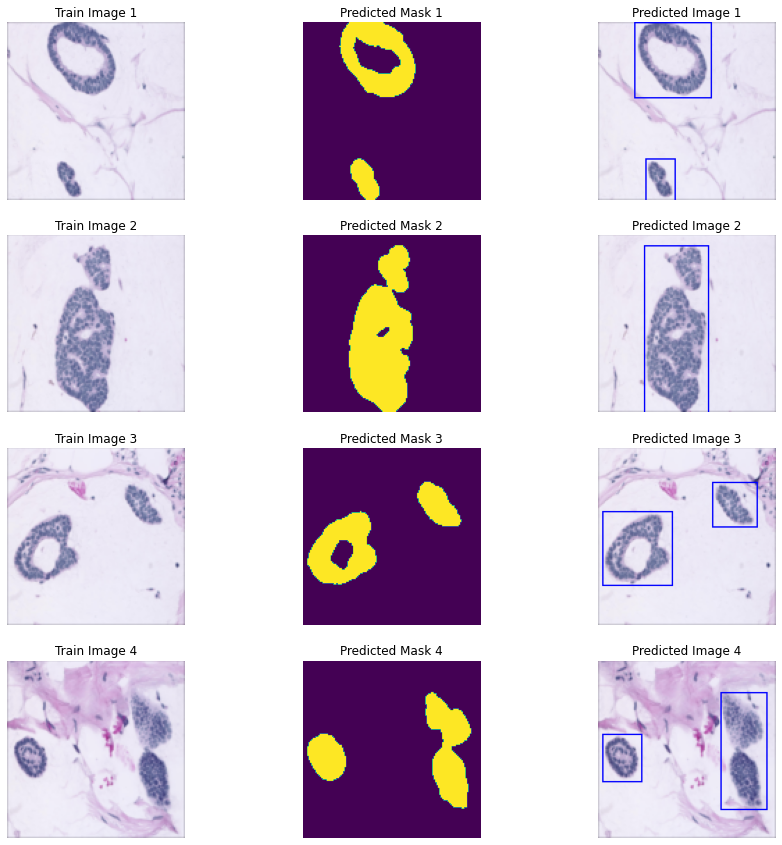

In [30]:
draw_sub_plots_3(4,3,X,Y,draw_over,False)

In [37]:
X_t = np.zeros((4, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

Y=[]
names=[]
c=0
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  print(id_)
  c+=1
  names.append(id_)
  path = TRAIN_PATH 
  img = imread(path + id_)[:,:,:IMG_CHANNELS]  
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  X_t[c-1]=img
  if(c==4):
    break
preds_train = model.predict(X_t, verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)


  0%|          | 0/150 [00:00<?, ?it/s]

Case_1-05.jpg


  1%|          | 1/150 [00:00<01:17,  1.93it/s]

Case_15-02.jpg


  1%|▏         | 2/150 [00:00<01:10,  2.09it/s]

Case_8-01.jpg


  2%|▏         | 3/150 [00:01<01:08,  2.15it/s]

Case_4-09.jpg


  2%|▏         | 3/150 [00:01<01:29,  1.64it/s]

1/1 [==============================] - 0s 29ms/step


In [39]:
X=[]
Y=[]
draw_over=[]
gt=[]
for i in range(4):
  X.append(X_t[i])
  # gt.append(Y_train[i])
  Y.append(resize(np.squeeze(preds_train_t[i]), (128,128), mode='constant', preserve_range=True))
  image = np.squeeze(preds_train_t[i])
  img_1=X_t[i].copy()
  lbl_0 = label(image) 
  props = regionprops(lbl_0)
  for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 1)
  draw_over.append(img_1)

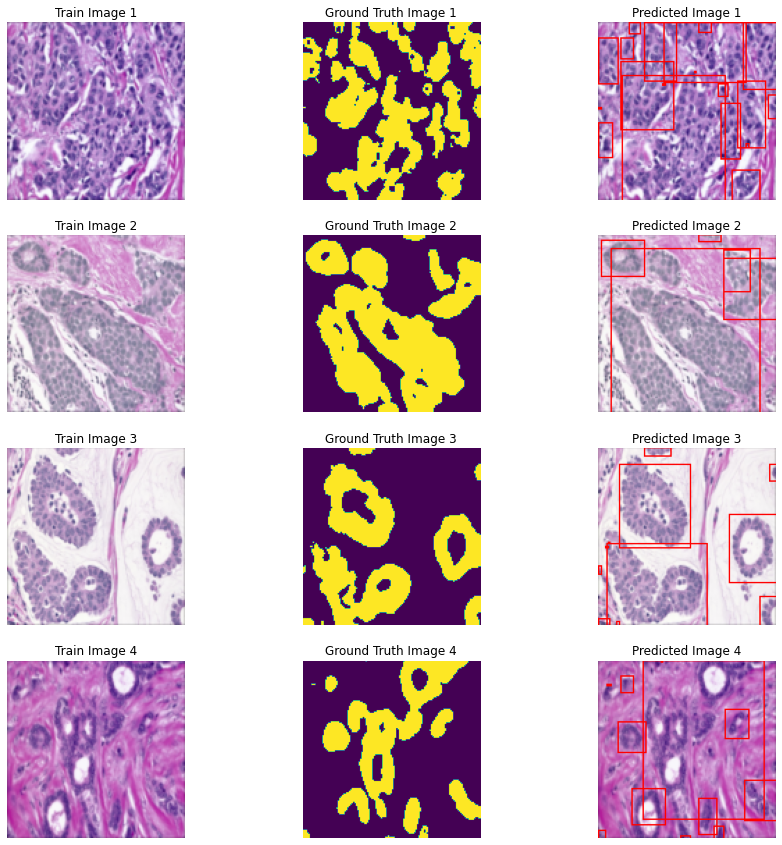

In [40]:
draw_sub_plots_3(4,3,X,Y,draw_over,True)

In [41]:
print(names)

['Case_1-05.jpg', 'Case_15-02.jpg', 'Case_8-01.jpg', 'Case_4-09.jpg']
